<a href="https://colab.research.google.com/github/shaggy99999/hse21_hw3/blob/main/hw3_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'backports', 'openssl', 'nlme'



In [3]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [5]:
info   <- read.table("ALL.info", header=TRUE, row.names="sample")
counts <- as.matrix(read.table("ALL.counts", header=TRUE, row.names="geneID"))

dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [6]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,2262,3504,4031,4489,3919,5700
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,92,136,152,345,273,468
ENSMUSG00000000031.16,36694,48225,56064,64504,33249,64992
ENSMUSG00000000037.17,27,44,52,77,68,87
ENSMUSG00000000049.11,5,8,10,4,1,1


In [7]:
head(info)

,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


In [8]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



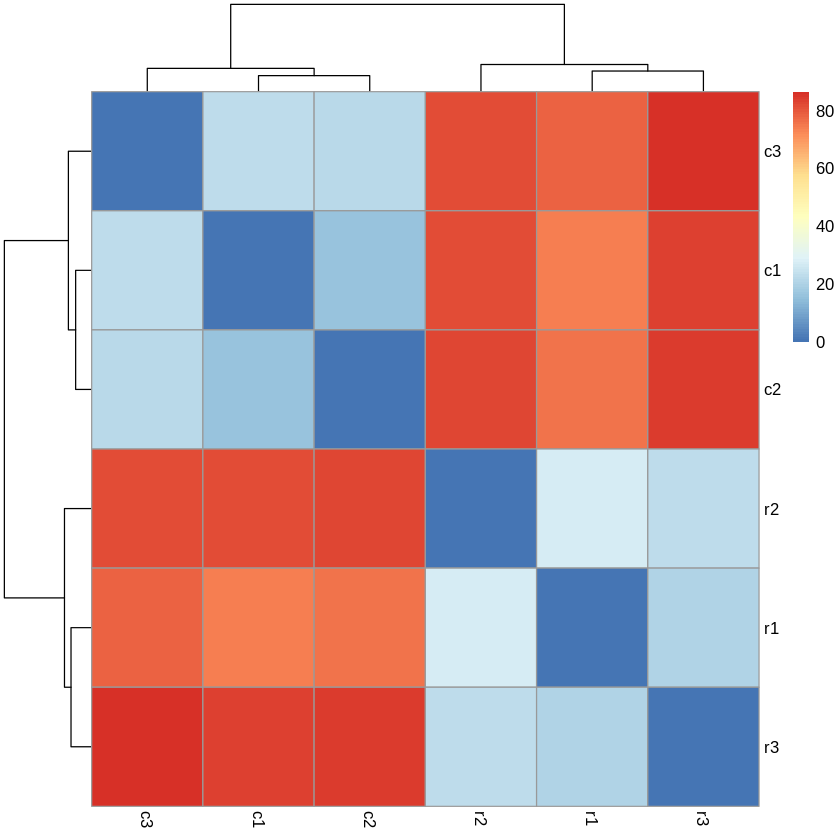

In [9]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)

In [11]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

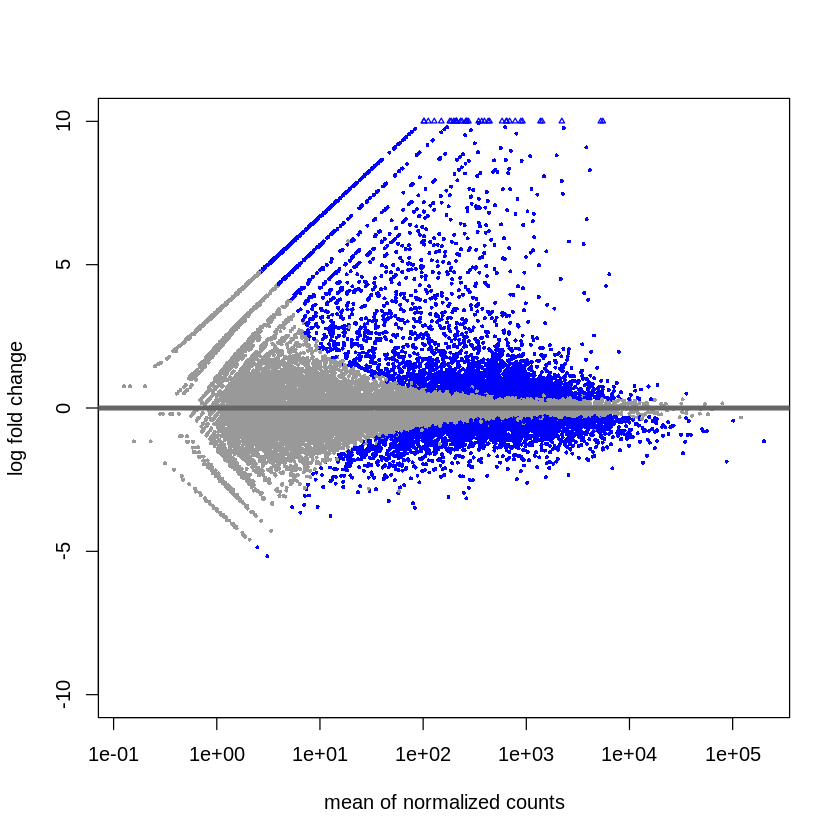

In [12]:
plotMA(res, ylim=c(-10,10))

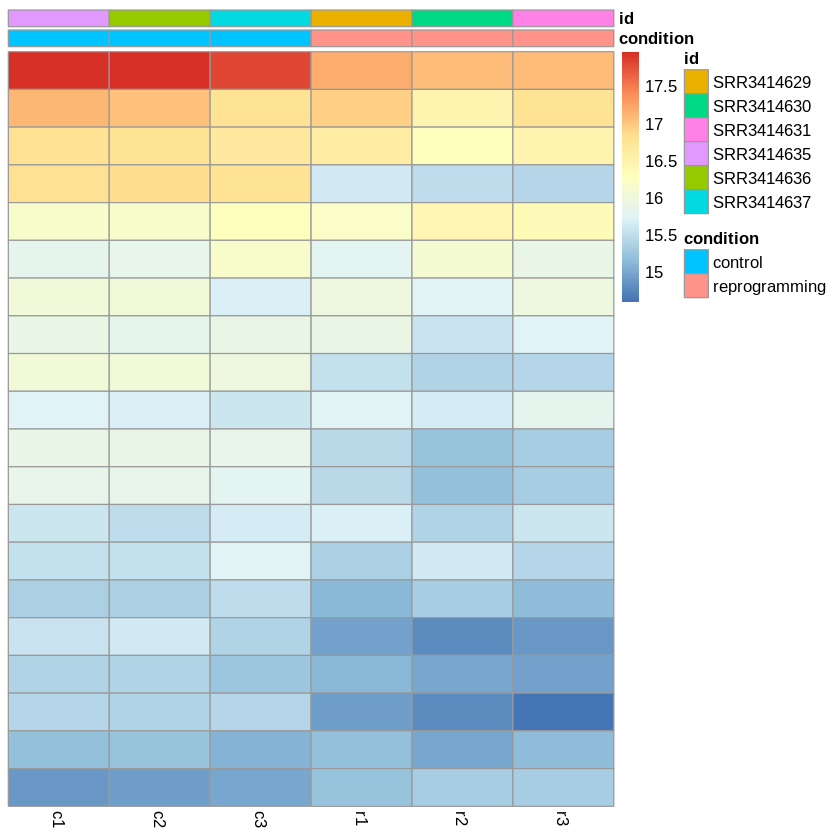

In [13]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat    pvalue
                      <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000031.16   48917.2     -0.0319616  0.121185 -0.263743  0.791978
                           padj
                      <numeric>
ENSMUSG00000000031.16  0.881447

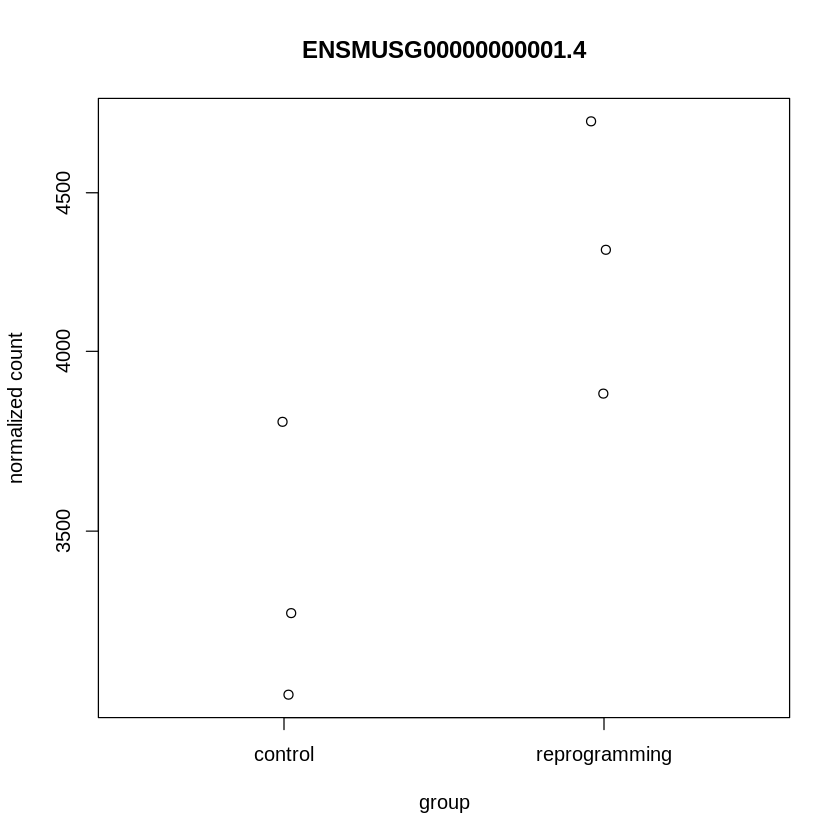

In [14]:
res[4,]
plotCounts(dds, gene=1, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000184.12   18633.3      -0.776403 0.0817178  -9.50103 2.07826e-21
                             padj
                        <numeric>
ENSMUSG00000000184.12 4.73442e-20

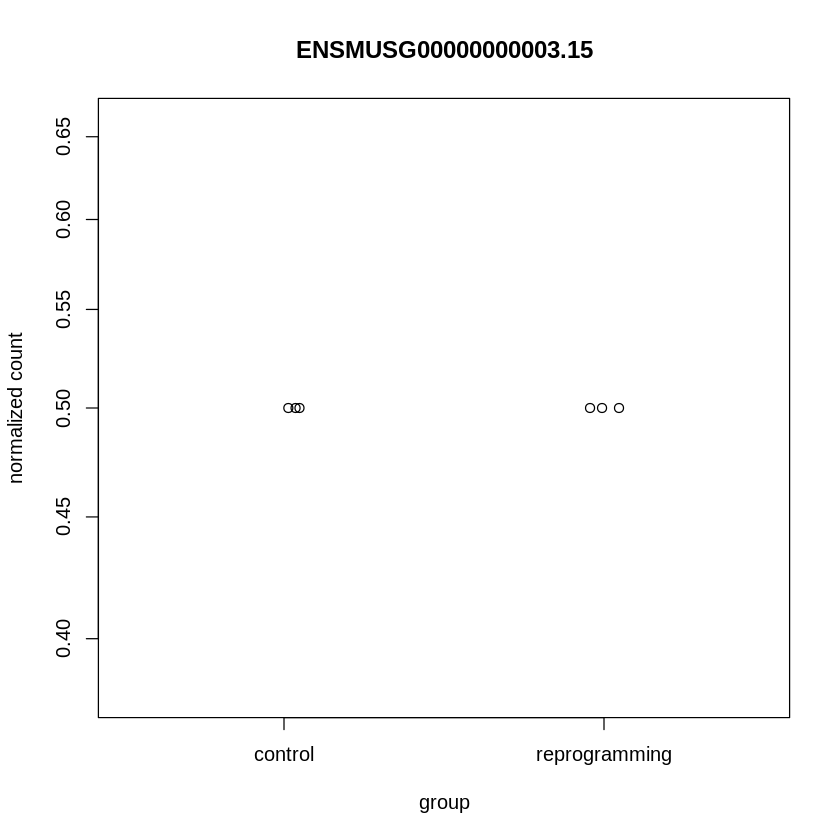

In [15]:
res[32,]
plotCounts(dds, gene=2, intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat      pvalue
                      <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000278.10   4754.03       -1.35782 0.0860319  -15.7828 4.08912e-56
                             padj
                        <numeric>
ENSMUSG00000000278.10 3.75523e-54

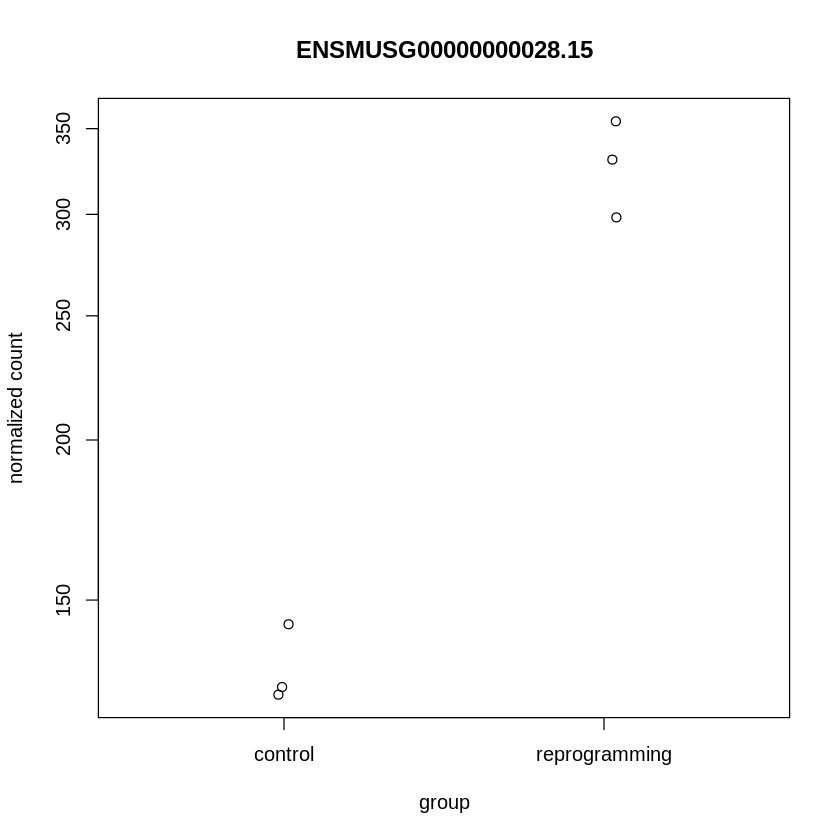

In [16]:
res[49,]
plotCounts(dds, gene=3, intgroup="condition")